# Hello geopandas

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Reading (part 1)

Data sources: http://www.gugik.gov.pl/pzgik/dane-bez-oplat/dane-z-panstwowego-rejestru-granic-i-powierzchni-jednostek-podzialow-terytorialnych-kraju-prg

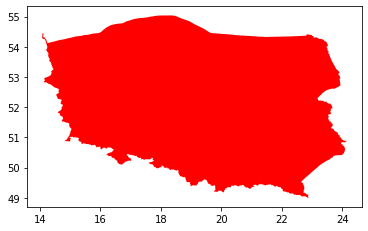

In [2]:
country = gpd.read_file("Państwo.shp", encoding='utf-8')
country.plot(color='r')

2477

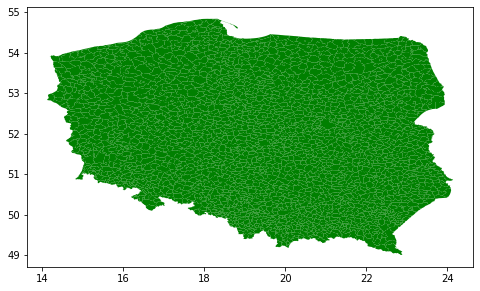

In [3]:
gminas = gpd.read_file("Gminy.shp", encoding='utf-8')
gminas.plot(color = 'g', figsize=(8,8))
len(gminas)

16

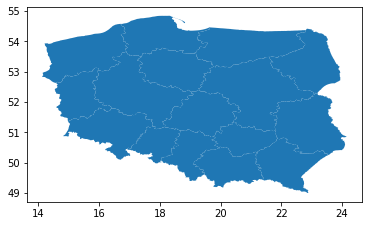

In [4]:
voivodeships = gpd.read_file("Województwa.shp", encoding='utf-8')
voivodeships.plot()
len(voivodeships)

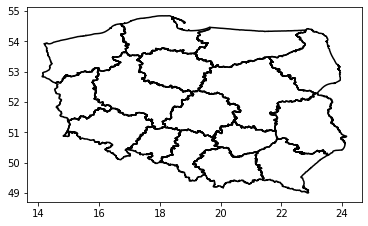

In [5]:
voivodeships.boundary.plot(color="k")

In [6]:
voivodeships[["JPT_NAZWA_", "Shape_Area"]].head()

,JPT_NAZWA_,Shape_Area
0,śląskie,1.557335
1,opolskie,1.196205
2,wielkopolskie,3.932196
3,świętokrzyskie,1.491827
4,pomorskie,2.520630


In [7]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

## Background maps

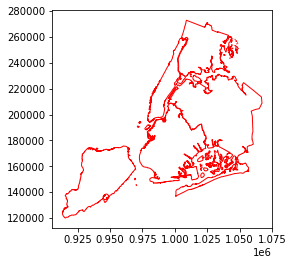

In [8]:
d = gpd.read_file(gpd.datasets.get_path("nybb"))
d.plot(edgecolor='r', linewidth=1, facecolor="none")

In [9]:
import contextily as ctx

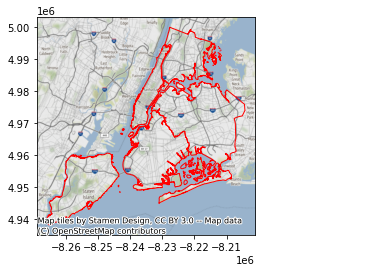

In [10]:
d = d.to_crs(epsg=3857)
ctx.add_basemap(d.plot(edgecolor='r', linewidth=1, facecolor="none"))
# for borders only better use d.boundary.plot(...)

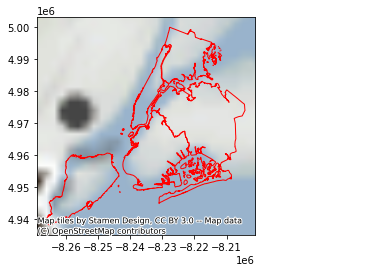

In [11]:
d = d.to_crs(epsg=3857)
plot = d.plot(edgecolor='r', linewidth=1, facecolor="none")
ctx.add_basemap(plot, zoom=6) # terrible zoom

In [12]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'attribution': '(C) Openstreetmap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by 

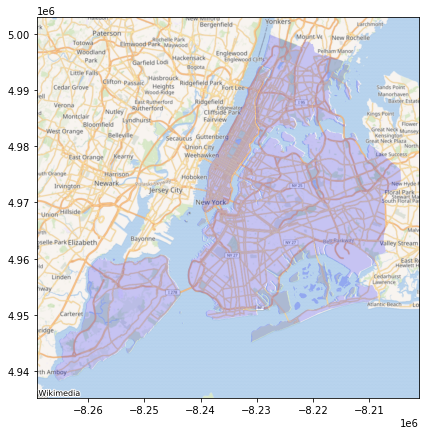

In [13]:
d = d.to_crs(epsg=3857)
plot = d.plot(figsize=(7,7), facecolor="b", alpha=0.2)
ctx.add_basemap(plot, source=ctx.providers.Wikimedia)

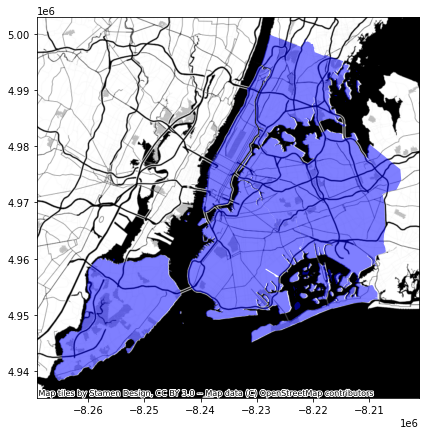

In [14]:
d = d.to_crs(epsg=3857)
plot = d.plot(figsize=(7,7), facecolor="b", alpha=0.5)
ctx.add_basemap(plot, source=ctx.providers.Stamen.TonerBackground)

## Reading (part 2)

#### Rivers in Europe

Data sources: http://geojson.xyz/

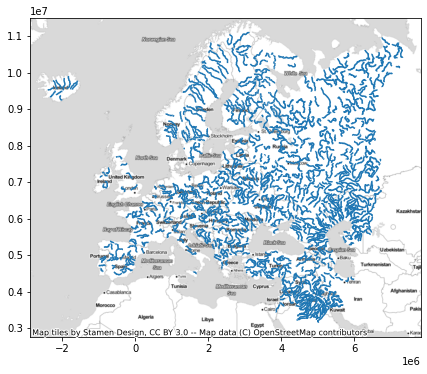

In [15]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_10m_rivers_europe.geojson"
d = gpd.read_file(url)
d = d.to_crs(epsg=3857)
ctx.add_basemap(d.plot(figsize=(7,7)), source=ctx.providers.Stamen.TonerLite)

#### Ports in North America and Oceania

In [16]:
mask = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
mask.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [17]:
mask = mask.loc[mask["continent"].isin(["North America", "Oceania"])]
mask.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."


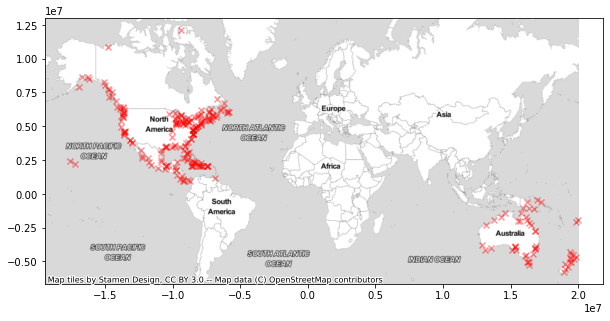

In [18]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_10m_ports.geojson"
d = gpd.read_file(url, mask=mask)

d = d.to_crs(epsg=3857)
d = d.plot(figsize=(10,10), alpha=0.4, color="r", marker="x")
ctx.add_basemap(d, source=ctx.providers.Stamen.TonerLite, zoom=2)

## Selecting/Indexing

In [19]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


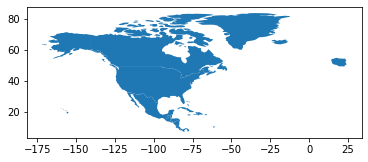

In [20]:
myfavourite = world.loc[(world.continent == "North America") | (world.name.isin(["Poland", "Iceland"]))]
myfavourite.plot()

#### Coordinates based indexing

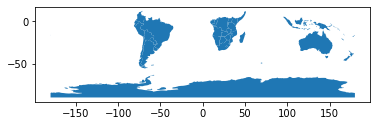

In [21]:
south = world.cx[:, :0]
south.plot()

## Making maps

In [22]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world[world.name != "Antarctica"]
world['gdp_per_cap']= world.gdp_md_est / world.pop_est

cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


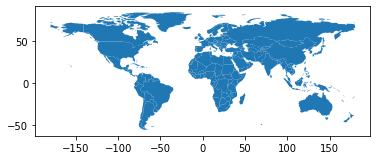

In [23]:
world.plot()

#### GDP per Capita

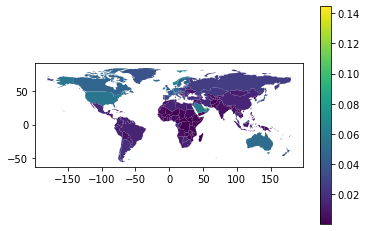

In [24]:
world.plot(column="gdp_per_cap", legend=True)

#### GDP per Capita (v2)

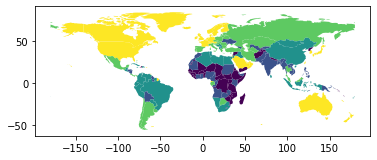

In [34]:
# conda install -c conda-forge mapclassify
world.plot(column='gdp_per_cap', scheme='quantiles');

#### Population

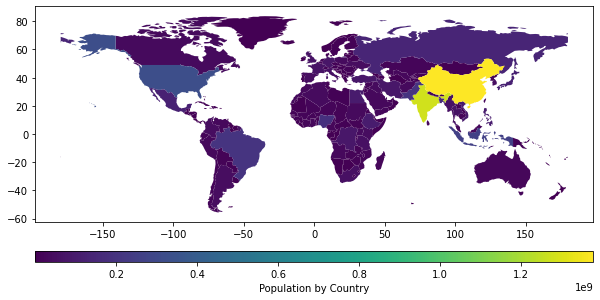

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,1, figsize=(10,20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.4)

world.plot(column="pop_est", cax=cax, ax=ax, legend="True", legend_kwds={"label":"Population by Country",
                                                                        "orientation":"horizontal"})

### Filtering some countries

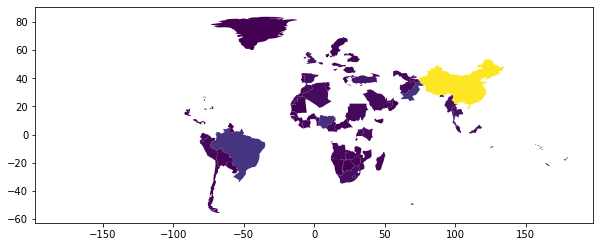

In [41]:
import numpy as np

world.loc[np.random.choice(world.index, 50), "pop_est"] = np.nan
world.plot(column="pop_est", figsize=(10,20))

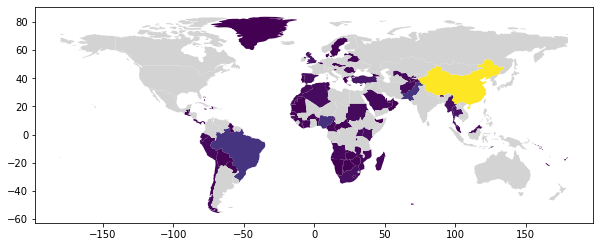

In [44]:
world.plot(column="pop_est", figsize=(10,20), missing_kwds={"color":"lightgray"})

#### Capital cities

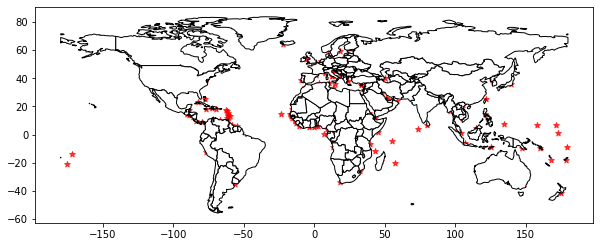

In [71]:
fig, ax = plt.subplots(figsize=(10,20))
cities.plot(ax=ax, color="r", marker="*", alpha=0.75)
world.plot(ax=ax, color='white', edgecolor='black')

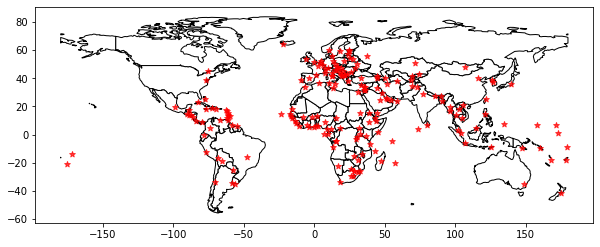

In [74]:
fig, ax = plt.subplots(figsize=(10,20))
cities.plot(ax=ax, color="r", marker="*", alpha=0.75, zorder=2)
world.plot(ax=ax, color='white', edgecolor='black', zorder=1)